# Convolutions and Pooling

Short demonstration to show effects of convolution masks and image pooling


In [2]:
!git clone https://github.com/bfromson/bbkaids

/usr/bin/sh: 1: git: not found


#### Import Libraries

In [1]:
from matplotlib import image
from matplotlib import pyplot
from scipy import signal
import numpy as np

#### Load and display a simple image

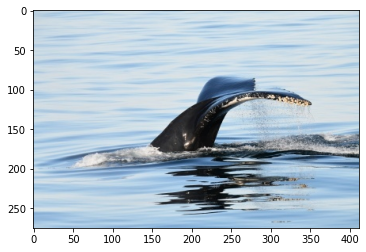

In [30]:
img = image.imread('bbkaids/WhaleScaled.jpg')
pyplot.imshow(img)
pyplot.show()

#### Before doing anything else let's take a 250*250 crop from the image

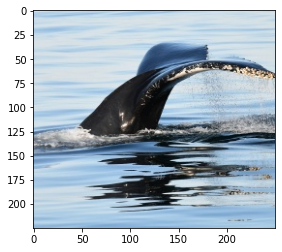

In [31]:
img = img[50:300,100:350,:]
pyplot.imshow(img)
pyplot.show()

#### Define filter routine that performs a simple convolution on an RGB image and rescales the results to range 0..1

In [32]:
def ImageFilter(image, filter):
    r = signal.convolve2d(image[:,:,0], filter, mode='full', boundary='fill', fillvalue=0)
    g = signal.convolve2d(image[:,:,1], filter, mode='full', boundary='fill', fillvalue=0)
    b = signal.convolve2d(image[:,:,2], filter, mode='full', boundary='fill', fillvalue=0)
    r = (r - np.min(r)) / (np.max(r) - np.min(r))
    g = (g - np.min(g)) / (np.max(g) - np.min(g))
    b = (b - np.min(b)) / (np.max(b) - np.min(b))
    return np.dstack((r,g,b))

And define second routine that performs a MaxPool operation

In [33]:
def ImagePool(image, poolsize):
    oldx = image.shape[0]
    oldy = image.shape[1]
    newx = oldx // poolsize
    newy = oldy // poolsize
    r = np.zeros((newx,newy))
    g = np.zeros((newx,newy))
    b = np.zeros((newx,newy))
    for x in range(0, oldx, poolsize):
        for y in range(0, oldy, poolsize):
            if ((x+poolsize)<oldx and (y+poolsize)<oldy):
                r[x // poolsize , y // poolsize] = np.max (image[x:x+poolsize, y:y+poolsize, 0])
                g[x // poolsize , y // poolsize] = np.max (image[x:x+poolsize, y:y+poolsize, 1])
                b[x // poolsize , y // poolsize] = np.max (image[x:x+poolsize, y:y+poolsize, 2])
    return np.dstack((r,g,b))
            
        

## Now lets define a few filters and see the effects they have on the image

#### First a blur filter

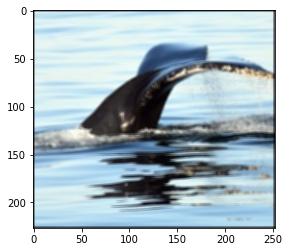

In [46]:
blurfilter = np.array(
    [
        [ 1,  1,  1],
        [ 1,  0,  1],
        [ 1,  1,  1] ] )
imgb = ImageFilter(img, blurfilter)
pyplot.imshow(imgb)
pyplot.show()

#### And a sharpen filter

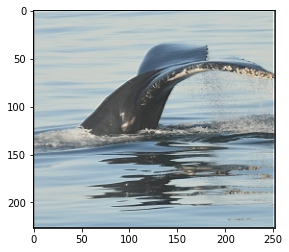

In [47]:
vfilter  =np.array(
    [
        [-1,  -1,  1],
        [-1,  12,  1],
        [-1,  -1,  1]])
img8 = ImageFilter(img, vfilter)
pyplot.imshow(img8)
pyplot.show()

### then a horizontal line filter

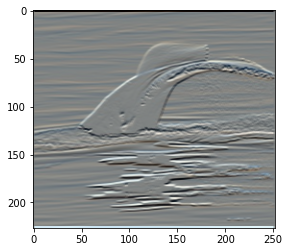

In [48]:
hfilter = np.array(
    [
        [ -1,  -1,  -1],
        [ 0,  0,  0],
        [ 1,  1,  1] ] )
img2 = ImageFilter(img, hfilter)



pyplot.imshow(img2)
pyplot.show()

#### Then a vertical line filter

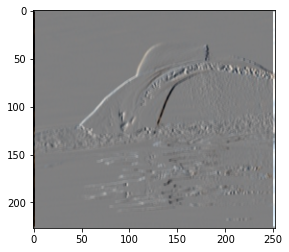

In [49]:
vfilter  =np.array(
    [
        [-1,  0,  1],
        [-1,  0,  1],
        [-1,  0,  1]])
img3 = ImageFilter(img, vfilter)
pyplot.imshow(img3)
pyplot.show()

#### And add the two together to get vertical and horizontal lines but apply to blurred image

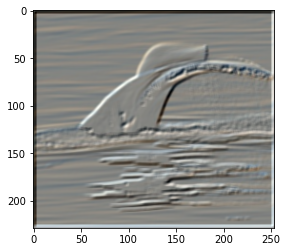

In [50]:
hvfilter = hfilter + vfilter
img4 = ImageFilter(imgb, hvfilter)
pyplot.imshow(img4)
pyplot.show()

#### and a simple pooling operation

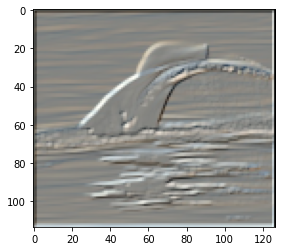

In [51]:
img5 = ImagePool(img4, 2)
pyplot.imshow(img5)
pyplot.show()

#### and combine a new filter and pool

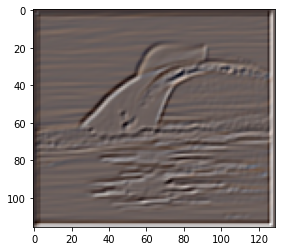

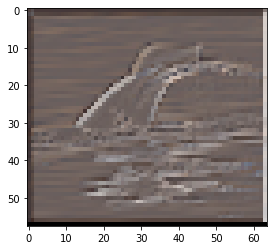

In [52]:
filter = np.array(
    [
        [-1, -1,  0],
        [-1,  0,  1],
        [ 0,  1,  1]])
img6 = ImageFilter(img5, filter)
pyplot.imshow(img6)
pyplot.show()
img7 = ImagePool(img6, 2)
pyplot.imshow(img7)
pyplot.show()